## Imports

In [118]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

## All Models (SI, SIS, SIR, SIRS)

In [119]:
def initialize_state(G, initial_infected):
    state = {}
    for node in G.nodes():
        if node in initial_infected:
            state[node] = 'I'
        else:
            state[node] = 'S'
    return state

In [120]:
def si_model(G, initial_infected, beta, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
        susceptible_count.append(susceptible_count[-1] - newly_infected)  # Update susceptible count
        infected_count.append(infected_count[-1] + newly_infected)  # Update infected count
    return susceptible_count, infected_count


In [121]:
def sis_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'S'  # Update state of infected node to susceptible
                newly_recovered += 1  # Increment count of newly recovered nodes
        susceptible_count.append(susceptible_count[-1] - newly_infected + newly_recovered)  # Update susceptible count
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)  # Update infected count
    return susceptible_count, infected_count


In [122]:
def sir_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    recovered_count = [0]  # Initialize recovered count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'R'  # Update state of infected node to recovered
                newly_recovered += 1  # Increment count of newly recovered nodes
        susceptible_count.append(susceptible_count[-1] - newly_infected)
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)
        recovered_count.append(recovered_count[-1] + newly_recovered)
    return susceptible_count, infected_count, recovered_count

In [123]:
def sirs_model(G, initial_infected, beta, gamma, mu, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    recovered_count = [0]  # Initialize recovered count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        newly_susceptible = 0  # Initialize count for newly susceptible nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'R'  # Update state of infected node to recovered
                newly_recovered += 1  # Increment count of newly recovered nodes
            elif state[node] == 'R' and random.random() < mu:
                state[node] = 'S'  # Update state of recovered node to susceptible
                newly_susceptible += 1  # Increment count of newly susceptible nodes
        susceptible_count.append(susceptible_count[-1] + newly_susceptible - newly_infected)
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)
        recovered_count.append(recovered_count[-1] + newly_recovered)
    return susceptible_count, infected_count, recovered_count

## Random Watts Strogatz Graph Creation

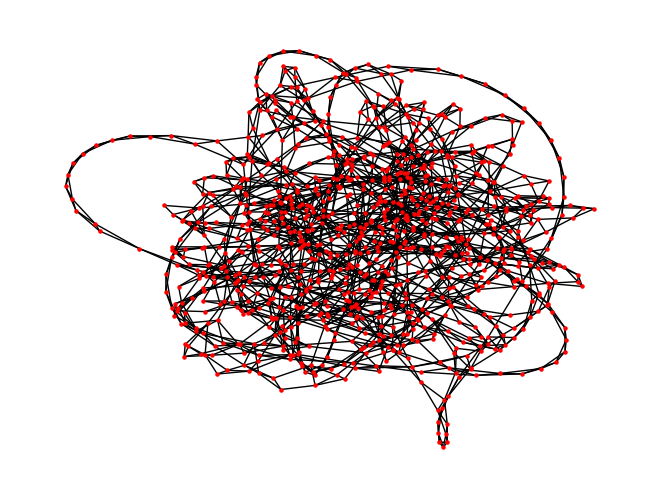

In [124]:
# Generate Watts-Strogatz graph
N = 1000  # Number of nodes
K = 4     # Average degree
p = 0.1   # Rewiring probability
G = nx.watts_strogatz_graph(N, K, p)
nx.draw(G, node_size=5, node_color='red', edge_color='black')

## Defining Parameters for Models

In [125]:
# Parameters
beta = 0.37  # Infection rate
gamma = 0.12  # Recovery rate
mu = 0.05  # Immunity loss rate
num_steps = 100

## Calculating Centralities and their highest values

In [126]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Find nodes with highest centrality for each measure
highest_degree_node = max(degree_centrality, key=degree_centrality.get)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

In [127]:
# Set initial infected nodes based on centrality measures
initial_infected_degree = [highest_degree_node]
initial_infected_betweenness = [highest_betweenness_node]
initial_infected_closeness = [highest_closeness_node]
initial_infected_eigenvector = [highest_eigenvector_node]

## SI Model

In [128]:
# Simulate epidemic models
si_infected_degree = si_model(G, initial_infected_degree, beta, num_steps)
si_infected_betweenness = si_model(G, initial_infected_betweenness, beta, num_steps)
si_infected_closeness = si_model(G, initial_infected_closeness, beta, num_steps)
si_infected_eigenvector = si_model(G, initial_infected_eigenvector, beta, num_steps)

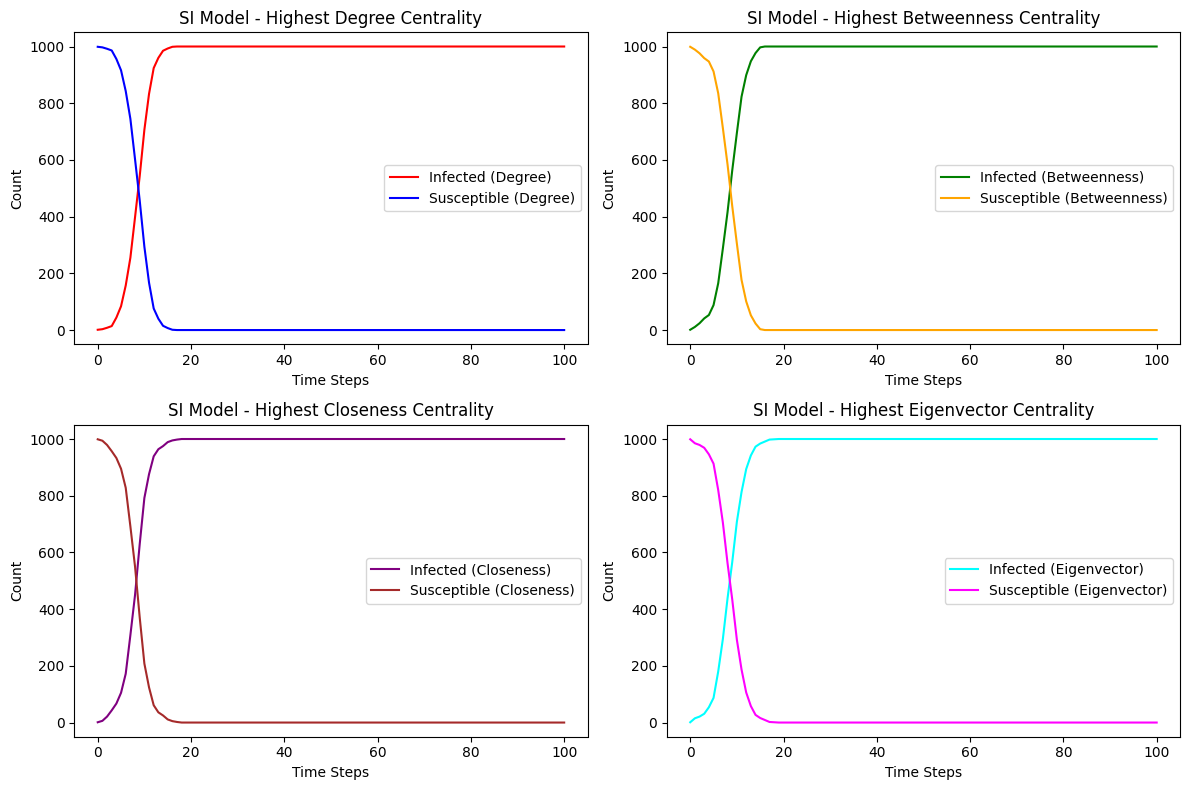

In [129]:
# Plotting
plt.figure(figsize=(12, 8))

# SI model with initial infected node chosen based on highest degree centrality
plt.subplot(2, 2, 1)
si_susceptible_degree, si_infected_degree = si_model(G, initial_infected_degree, beta, num_steps)
plt.plot(steps, si_infected_degree, label='Infected (Degree)', color='red')
plt.plot(steps, si_susceptible_degree, label='Susceptible (Degree)', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Degree Centrality')
plt.legend()

# SI model with initial infected node chosen based on highest betweenness centrality
plt.subplot(2, 2, 2)
si_susceptible_betweenness, si_infected_betweenness = si_model(G, initial_infected_betweenness, beta, num_steps)
plt.plot(steps, si_infected_betweenness, label='Infected (Betweenness)', color='green')
plt.plot(steps, si_susceptible_betweenness, label='Susceptible (Betweenness)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Betweenness Centrality')
plt.legend()

# SI model with initial infected node chosen based on highest closeness centrality
plt.subplot(2, 2, 3)
si_susceptible_closeness, si_infected_closeness = si_model(G, initial_infected_closeness, beta, num_steps)
plt.plot(steps, si_infected_closeness, label='Infected (Closeness)', color='purple')
plt.plot(steps, si_susceptible_closeness, label='Susceptible (Closeness)', color='brown')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Closeness Centrality')
plt.legend()

# SI model with initial infected node chosen based on highest eigenvector centrality
plt.subplot(2, 2, 4)
si_susceptible_eigenvector, si_infected_eigenvector = si_model(G, initial_infected_eigenvector, beta, num_steps)
plt.plot(steps, si_infected_eigenvector, label='Infected (Eigenvector)', color='cyan')
plt.plot(steps, si_susceptible_eigenvector, label='Susceptible (Eigenvector)', color='magenta')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Eigenvector Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## SIS Model

In [130]:
# Simulate epidemic models
sis_infected_degree = sis_model(G, initial_infected_degree, beta, gamma, num_steps)
sis_infected_betweenness = sis_model(G, initial_infected_betweenness, beta, gamma, num_steps)
sis_infected_closeness = sis_model(G, initial_infected_closeness, beta, gamma, num_steps)
sis_infected_eigenvector = sis_model(G, initial_infected_eigenvector, beta, gamma, num_steps)

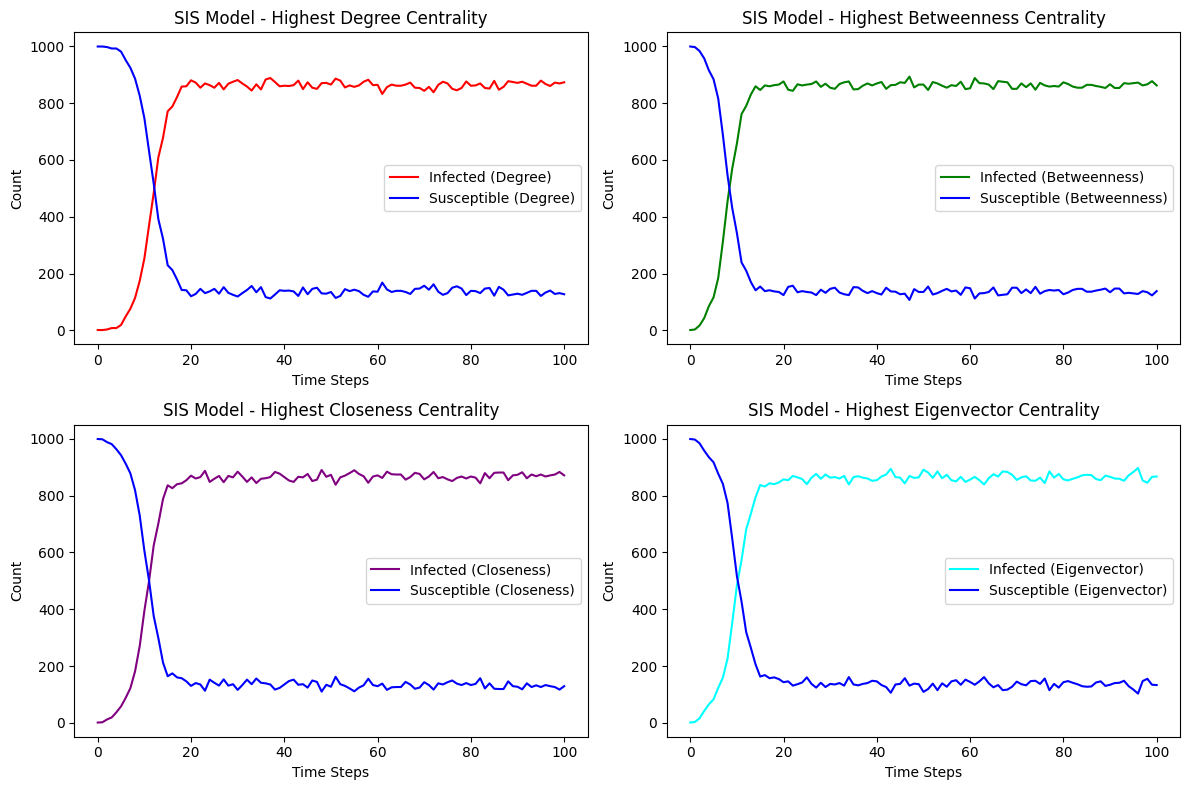

In [131]:
# Plotting
plt.figure(figsize=(12, 8))

# SIS model with initial infected node chosen based on highest degree centrality
plt.subplot(2, 2, 1)
sis_susceptible_degree, sis_infected_degree = sis_model(G, initial_infected_degree, beta, gamma, num_steps)
plt.plot(steps, sis_infected_degree, label='Infected (Degree)', color='red')
plt.plot(steps, sis_susceptible_degree, label='Susceptible (Degree)', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Degree Centrality')
plt.legend()

# SIS model with initial infected node chosen based on highest betweenness centrality
plt.subplot(2, 2, 2)
sis_susceptible_betweenness, sis_infected_betweenness = sis_model(G, initial_infected_betweenness, beta, gamma, num_steps)
plt.plot(steps, sis_infected_betweenness, label='Infected (Betweenness)', color='green')
plt.plot(steps, sis_susceptible_betweenness, label='Susceptible (Betweenness)', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Betweenness Centrality')
plt.legend()

# SIS model with initial infected node chosen based on highest closeness centrality
plt.subplot(2, 2, 3)
sis_susceptible_closeness, sis_infected_closeness = sis_model(G, initial_infected_closeness, beta, gamma, num_steps)
plt.plot(steps, sis_infected_closeness, label='Infected (Closeness)', color='purple')
plt.plot(steps, sis_susceptible_closeness, label='Susceptible (Closeness)', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Closeness Centrality')
plt.legend()

# SIS model with initial infected node chosen based on highest eigenvector centrality
plt.subplot(2, 2, 4)
sis_susceptible_eigenvector, sis_infected_eigenvector = sis_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
plt.plot(steps, sis_infected_eigenvector, label='Infected (Eigenvector)', color='cyan')
plt.plot(steps, sis_susceptible_eigenvector, label='Susceptible (Eigenvector)', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Eigenvector Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## SIR Model

In [132]:
# Simulate epidemic models
sir_infected_degree = sir_model(G, initial_infected_degree, beta, gamma, num_steps)
sir_infected_betweenness = sir_model(G, initial_infected_betweenness, beta, gamma, num_steps)
sir_infected_closeness = sir_model(G, initial_infected_closeness, beta, gamma, num_steps)
sir_infected_eigenvector = sir_model(G, initial_infected_eigenvector, beta, gamma, num_steps)

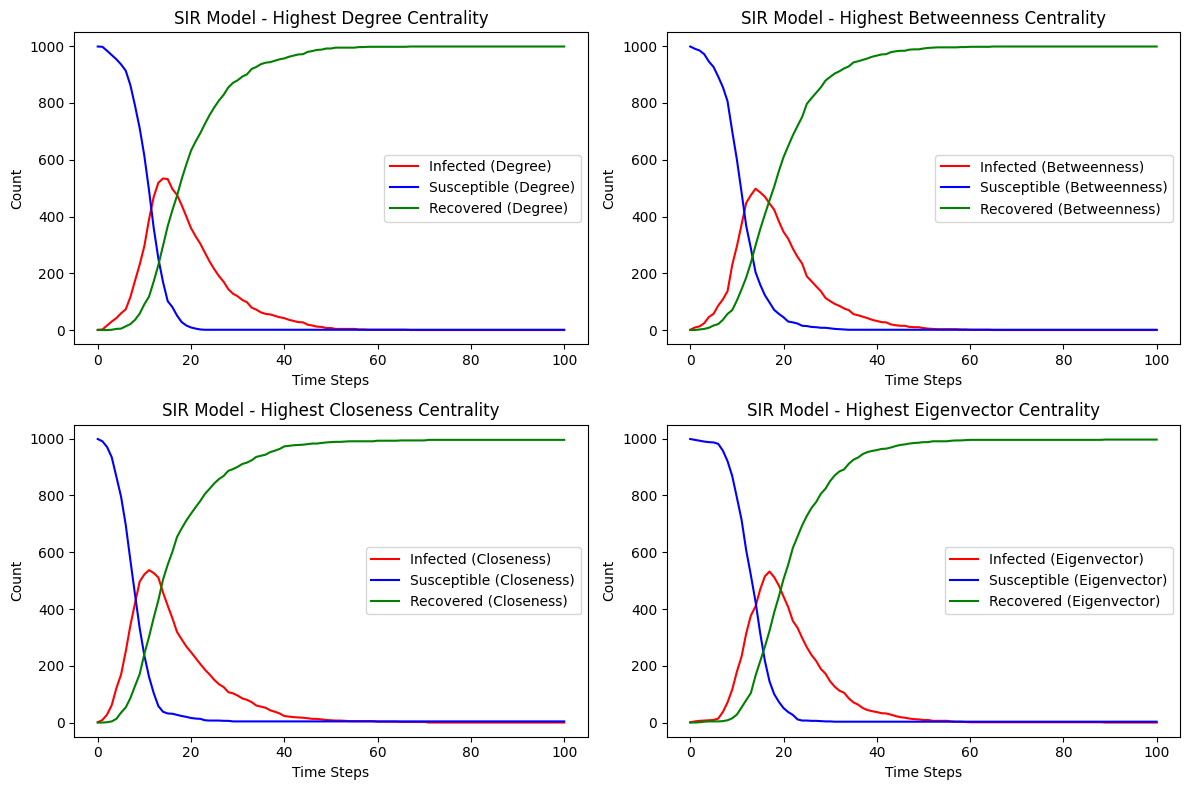

In [133]:
# Plotting
plt.figure(figsize=(12, 8))

# SIR model with initial infected node chosen based on highest degree centrality
plt.subplot(2, 2, 1)
sir_susceptible_degree, sir_infected_degree, sir_recovered_degree = sir_model(G, initial_infected_degree, beta, gamma, num_steps)
plt.plot(steps, sir_infected_degree, label='Infected (Degree)', color='red')
plt.plot(steps, sir_susceptible_degree, label='Susceptible (Degree)', color='blue')
plt.plot(steps, sir_recovered_degree, label='Recovered (Degree)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Degree Centrality')
plt.legend()

# SIR model with initial infected node chosen based on highest betweenness centrality
plt.subplot(2, 2, 2)
sir_susceptible_betweenness, sir_infected_betweenness, sir_recovered_betweenness = sir_model(G, initial_infected_betweenness, beta, gamma, num_steps)
plt.plot(steps, sir_infected_betweenness, label='Infected (Betweenness)', color='red')
plt.plot(steps, sir_susceptible_betweenness, label='Susceptible (Betweenness)', color='blue')
plt.plot(steps, sir_recovered_betweenness, label='Recovered (Betweenness)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Betweenness Centrality')
plt.legend()

# SIR model with initial infected node chosen based on highest closeness centrality
plt.subplot(2, 2, 3)
sir_susceptible_closeness, sir_infected_closeness, sir_recovered_closeness = sir_model(G, initial_infected_closeness, beta, gamma, num_steps)
plt.plot(steps, sir_infected_closeness, label='Infected (Closeness)', color='red')
plt.plot(steps, sir_susceptible_closeness, label='Susceptible (Closeness)', color='blue')
plt.plot(steps, sir_recovered_closeness, label='Recovered (Closeness)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Closeness Centrality')
plt.legend()

# SIR model with initial infected node chosen based on highest eigenvector centrality
plt.subplot(2, 2, 4)
sir_susceptible_eigenvector, sir_infected_eigenvector, sir_recovered_eigenvector = sir_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
plt.plot(steps, sir_infected_eigenvector, label='Infected (Eigenvector)', color='red')
plt.plot(steps, sir_susceptible_eigenvector, label='Susceptible (Eigenvector)', color='blue')
plt.plot(steps, sir_recovered_eigenvector, label='Recovered (Eigenvector)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Eigenvector Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## Highest Eigenvector Centrality Node as initial infected

In [134]:
# Simulate epidemic models
sirs_infected_degree = sirs_model(G, initial_infected_degree, beta, gamma, mu, num_steps)
sirs_infected_betweenness = sirs_model(G, initial_infected_betweenness, beta, gamma, mu, num_steps)
sirs_infected_closeness = sirs_model(G, initial_infected_closeness, beta, gamma, mu, num_steps)
sirs_infected_eigenvector = sirs_model(G, initial_infected_eigenvector, beta, gamma, mu, num_steps)

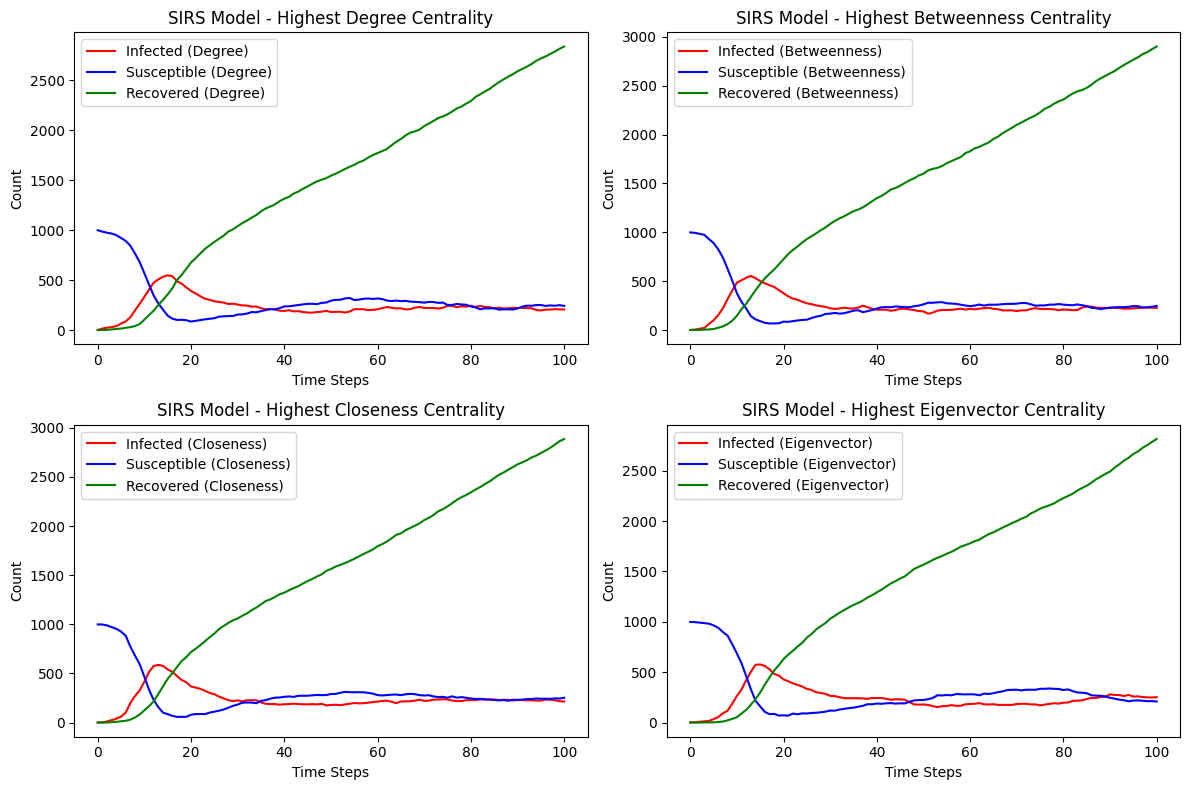

In [135]:
# Plotting
plt.figure(figsize=(12, 8))

# SIRS model with initial infected node chosen based on highest degree centrality
plt.subplot(2, 2, 1)
sirs_susceptible_degree, sirs_infected_degree, sirs_recovered_degree = sirs_model(G, initial_infected_degree, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected_degree, label='Infected (Degree)', color='red')
plt.plot(steps, sirs_susceptible_degree, label='Susceptible (Degree)', color='blue')
plt.plot(steps, sirs_recovered_degree, label='Recovered (Degree)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Degree Centrality')
plt.legend()

# SIRS model with initial infected node chosen based on highest betweenness centrality
plt.subplot(2, 2, 2)
sirs_susceptible_betweenness, sirs_infected_betweenness, sirs_recovered_betweenness = sirs_model(G, initial_infected_betweenness, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected_betweenness, label='Infected (Betweenness)', color='red')
plt.plot(steps, sirs_susceptible_betweenness, label='Susceptible (Betweenness)', color='blue')
plt.plot(steps, sirs_recovered_betweenness, label='Recovered (Betweenness)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Betweenness Centrality')
plt.legend()

# SIRS model with initial infected node chosen based on highest closeness centrality
plt.subplot(2, 2, 3)
sirs_susceptible_closeness, sirs_infected_closeness, sirs_recovered_closeness = sirs_model(G, initial_infected_closeness, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected_closeness, label='Infected (Closeness)', color='red')
plt.plot(steps, sirs_susceptible_closeness, label='Susceptible (Closeness)', color='blue')
plt.plot(steps, sirs_recovered_closeness, label='Recovered (Closeness)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Closeness Centrality')
plt.legend()

# SIRS model with initial infected node chosen based on highest eigenvector centrality
plt.subplot(2, 2, 4)
sirs_susceptible_eigenvector, sirs_infected_eigenvector, sirs_recovered_eigenvector = sirs_model(G, initial_infected_eigenvector, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected_eigenvector, label='Infected (Eigenvector)', color='red')
plt.plot(steps, sirs_susceptible_eigenvector, label='Susceptible (Eigenvector)', color='blue')
plt.plot(steps, sirs_recovered_eigenvector, label='Recovered (Eigenvector)', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Eigenvector Centrality')
plt.legend()

plt.tight_layout()
plt.show()